In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

## Data

Let's consider `Carseats` data - a simulated data set containing sales of child car seats at 400 stores.

We want to predict sales using the predictors. Because `Sales` is continuous, we created a variable `High`, which indicates whether Sales is more than 8000 USD. 

Explore the data dictionary of `Carseats` at (ISLP-Carseats)[https://islp.readthedocs.io/en/latest/datasets/Carseats.html].

In [78]:
cs = pd.read_csv('https://raw.githubusercontent.com/PratheepaJ/datasets/master/Carseats.csv')

cs.info()
cs.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
 11  High         400 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,No


## Classification Trees

Fit a classification tree in order to predict `High` using all variables but `Sales`.

Convert categories to numerical categories.

In [79]:
cat = ['ShelveLoc', 'Urban', 'US']

for col in cat:
    cs[col] = pd.Categorical(cs[col]).codes

In [80]:
cs.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,Yes
1,11.22,111,48,16,260,83,1,65,10,1,1,Yes
2,10.06,113,35,10,269,80,2,59,12,1,1,Yes
3,7.40,117,100,4,466,97,2,55,14,1,1,No
4,4.15,141,64,3,340,128,0,38,13,1,0,No


Create predictor and response variables.

In [81]:
X = cs.drop(['Sales', 'High'], axis=1)
y = cs.High

Split the data 50%/50%


In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y)

In [83]:
X_train.head(5)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,138,108,17,203,128,1,33,14,1,1
271,111,56,0,504,110,2,62,16,1,0
85,125,103,0,304,112,2,49,13,0,0
65,122,26,0,197,128,2,55,13,0,0
12,122,35,2,393,136,2,62,18,1,0


In [84]:
y[:4]

0    Yes
1    Yes
2    Yes
3     No
Name: High, dtype: object

Fit the classification tree

In [85]:
# random_state=0 to have splits of features 
# the same the next time running
# make an instance of the model
cs_dt = DecisionTreeClassifier(
    max_depth = 10, 
    random_state=0
) 

In [86]:
cs_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

Interpret the decision tree results

1. Graphical summary:

[Text(0.5, 0.875, 'Price <= 123.5\ngini = 0.484\nsamples = 200\nvalue = [118, 82]\nclass = No'),
 Text(0.25, 0.625, 'ShelveLoc <= 0.5\ngini = 0.498\nsamples = 123\nvalue = [58, 65]\nclass = Yes'),
 Text(0.125, 0.375, 'Age <= 31.0\ngini = 0.313\nsamples = 36\nvalue = [29, 7]\nclass = No'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'CompPrice <= 121.5\ngini = 0.444\nsamples = 87\nvalue = [29, 58]\nclass = Yes'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Advertising <= 12.5\ngini = 0.344\nsamples = 77\nvalue = [60, 17]\nclass = No'),
 Text(0.625, 0.375, 'CompPrice <= 147.5\ngini = 0.267\nsamples = 63\nvalue = [53, 10]\nclass = No'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Age <= 53.5\ngini = 0.5\nsamples = 14\nvalue = [7, 7]\nclass = No'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

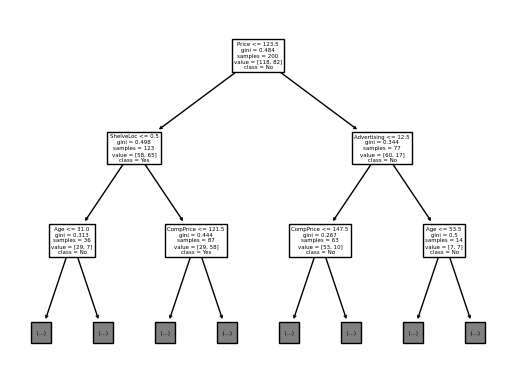

In [87]:
plot_tree(
    cs_dt, 
    max_depth= 2, 
    feature_names = X_train.columns.tolist(), 
    class_names=['No', 'Yes']
)

Disgard `Text(0.5, 0.875, ` - specifying the position of the text in the figure's coordinate system

Improve the figure

[Text(0.5, 0.875, 'Price <= 123.5\ngini = 0.484\nsamples = 200\nvalue = [118, 82]\nclass = No'),
 Text(0.25, 0.625, 'ShelveLoc <= 0.5\ngini = 0.498\nsamples = 123\nvalue = [58, 65]\nclass = Yes'),
 Text(0.125, 0.375, 'Age <= 31.0\ngini = 0.313\nsamples = 36\nvalue = [29, 7]\nclass = No'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'CompPrice <= 121.5\ngini = 0.444\nsamples = 87\nvalue = [29, 58]\nclass = Yes'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Advertising <= 12.5\ngini = 0.344\nsamples = 77\nvalue = [60, 17]\nclass = No'),
 Text(0.625, 0.375, 'CompPrice <= 147.5\ngini = 0.267\nsamples = 63\nvalue = [53, 10]\nclass = No'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Age <= 53.5\ngini = 0.5\nsamples = 14\nvalue = [7, 7]\nclass = No'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

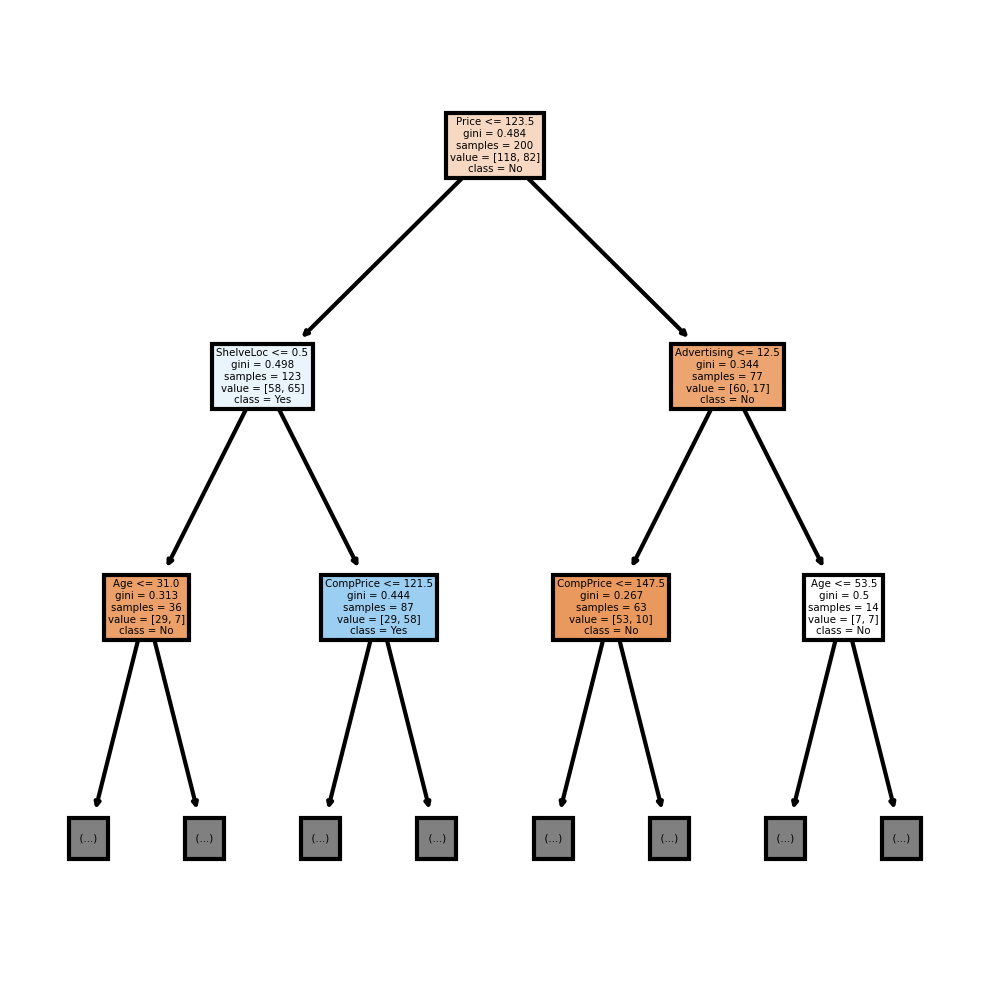

In [88]:
fig, axes = plt.subplots(
    nrows = 1,ncols = 1,figsize = (4,4), dpi=300
    )
plot_tree(
    cs_dt, 
    max_depth= 2, 
    feature_names = X_train.columns.tolist(), 
    class_names=['No', 'Yes'], 
    filled = True
    )

Explore the fitted tree summary

- split criterion.
- number of observations in each branch.
- Gini index.
- overall prediction for each branch.
- fraction of observations of classes in each branch.
- terminal nodes.

Compute the test error

In [89]:
pred = cs_dt.predict(X_test)
pred[:5]

array(['No', 'No', 'Yes', 'Yes', 'Yes'], dtype=object)

In [90]:
cm = pd.DataFrame(confusion_matrix(y_test, pred), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
cm

Predicted,No,Yes
True,,
No,94,24
Yes,32,50


Classification accuracy on the test set

In [91]:
cs_dt.score(X_test, y_test)

0.72

In [92]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          No       0.75      0.80      0.77       118
         Yes       0.68      0.61      0.64        82

    accuracy                           0.72       200
   macro avg       0.71      0.70      0.71       200
weighted avg       0.72      0.72      0.72       200



- Precision - percentage of correct postive predictions relative to total positive prediction. Class Yes: 52/72 and Class NO: 98/128.

* Recall - Percentage of correct positive predictions relative to the total actual positives (sensitivity).

* F1-score = A weighted harmonic mean of precision and recall. 
    * $F1 = \frac{2* \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$.

* Precision weighted average $= \frac{TP_{1}+ TP_{2}}{TP_{1}+TP_{2}+FP_{1}+FP_{2}}$.

* Precision macro average $=\frac{\text{Precision}_{1}+ \text{Precision}_{2}}{2}$.

Pruning tree

In [93]:
path = cs_dt.cost_complexity_pruning_path(
    X_train, 
    y_train
)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Find the number of nodes for each $\alpha$. Then, we can use accuracy to prune the tree.

In [94]:
clfs = [] # save fitted trees with different alphas
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=0, 
        ccp_alpha=ccp_alpha
        )
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [95]:
depth = [clf.tree_.max_depth for clf in clfs]
depth

[9, 9, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 2, 0]

In [96]:
test_score = [clf.score(X_test, y_test) for clf in clfs]

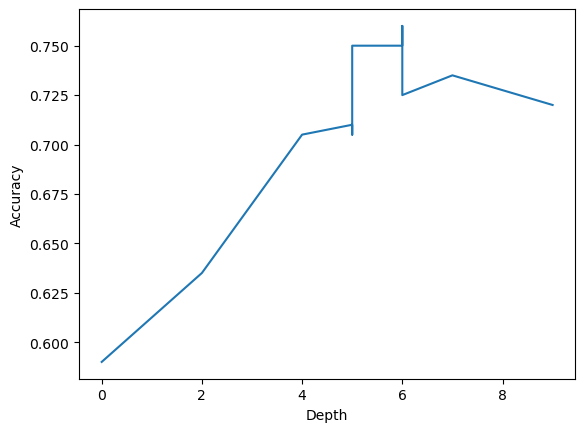

In [97]:
plt.plot(depth, test_score)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

Test accuracy is maximum at depth 5.

In [98]:
X_train.shape

(200, 10)

In [99]:
cs_dt_best = DecisionTreeClassifier(
    max_depth = 5, 
    random_state=0
    ) 
cs_dt_best.fit(X, y)

DecisionTreeClassifier(max_depth=5, random_state=0)

Feature importance


In [100]:
fea_imp = cs_dt_best.feature_importances_

In [101]:
# Sort the feature importances from greatest to 
# least using the sorted indices
sorted_indices = fea_imp.argsort()[::-1]# read from the tail of the argsort to get greatest to least indices of the elements
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = fea_imp[sorted_indices]

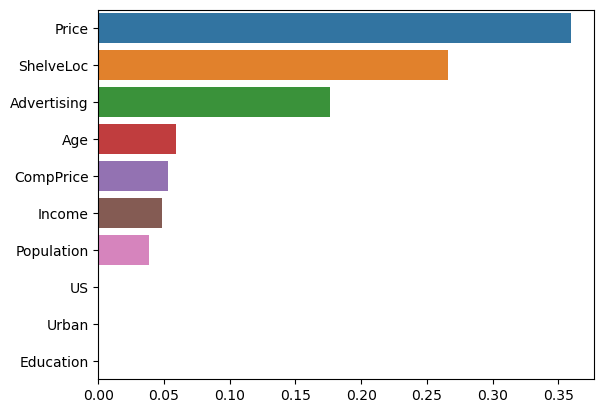

In [102]:
sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.show()

With a max-depth of 5, the tree might not explore all available features, especially if some features provide strong predictive power early on. Consequently, some potentially useful features might have low importance scores simply because the tree didn't explore splits on those features within the depth limit.

## Regression tree

Data: Consider `Boston` dataset, where the goal is to predict median house price. 

In [103]:
boston_df = pd.read_csv('https://raw.githubusercontent.com/PratheepaJ/datasets/master/Boston.csv')
boston_df.info()
boston_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Split the data to train/test

In [104]:
XBoston = boston_df.drop('medv', axis=1)# axis 1 is column
yBoston = boston_df.medv

XBoston_train, XBoston_test, yBoston_train, yBoston_test = train_test_split(
    XBoston, 
    yBoston, 
    test_size=0.5, 
    random_state=0
    )

Train the tree: need to find the max depth

In [105]:
rt_bt = DecisionTreeRegressor(random_state = 0)

In [106]:
path = rt_bt.cost_complexity_pruning_path(
    XBoston_train, 
    yBoston_train
    )
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [107]:
# fit the trees with each alpha
regs = []
for ccp_alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state = 0, ccp_alpha=ccp_alpha) 
    reg.fit(XBoston_train, yBoston_train)
    regs.append(reg)

In [108]:
# if we use the test test for model selection (validation set approach)
# find the validation error for each alpha
test_Boston_scores = [reg.score(XBoston_test, yBoston_test) for reg in regs]

In [109]:
# find the depth for each alpha
depth = [reg.tree_.max_depth for reg in regs]


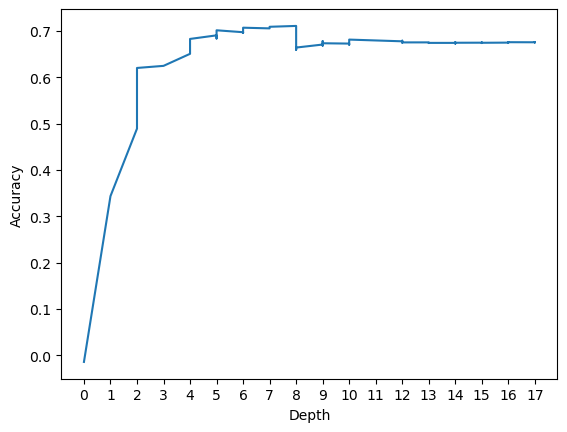

In [110]:
plt.plot(depth, test_Boston_scores)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.xticks(range(min(depth), max(depth) + 1))
plt.show()

Validation set accuracy is maximum at depth 7. 

Let's refit the model with depth =7 to find the feature importance. We can use all the data to train the model.

In [111]:
reg_Boston = DecisionTreeRegressor(max_depth = 7)
reg_Boston.fit(XBoston, yBoston)

DecisionTreeRegressor(max_depth=7)

In [112]:
fig, axes = plt.subplots(
    nrows = 1,
    ncols = 1,
    figsize = (5,5), 
    dpi=300
    )
plot_tree(
    reg_Boston, 
    max_depth = 3,# just to see the first three splits
    feature_names = XBoston.columns.tolist()
)

[Text(0.5431034482758621, 0.9, 'rm <= 6.941\nsquared_error = 84.42\nsamples = 506\nvalue = 22.533'),
 Text(0.27586206896551724, 0.7, 'lstat <= 14.4\nsquared_error = 40.273\nsamples = 430\nvalue = 19.934'),
 Text(0.13793103448275862, 0.5, 'dis <= 1.385\nsquared_error = 26.009\nsamples = 255\nvalue = 23.35'),
 Text(0.06896551724137931, 0.3, 'lstat <= 10.83\nsquared_error = 78.146\nsamples = 5\nvalue = 45.58'),
 Text(0.034482758620689655, 0.1, '\n  (...)  \n'),
 Text(0.10344827586206896, 0.1, '\n  (...)  \n'),
 Text(0.20689655172413793, 0.3, 'rm <= 6.543\nsquared_error = 14.885\nsamples = 250\nvalue = 22.905'),
 Text(0.1724137931034483, 0.1, '\n  (...)  \n'),
 Text(0.2413793103448276, 0.1, '\n  (...)  \n'),
 Text(0.41379310344827586, 0.5, 'crim <= 6.992\nsquared_error = 19.276\nsamples = 175\nvalue = 14.956'),
 Text(0.3448275862068966, 0.3, 'nox <= 0.531\nsquared_error = 11.391\nsamples = 101\nvalue = 17.138'),
 Text(0.3103448275862069, 0.1, '\n  (...)  \n'),
 Text(0.3793103448275862, 0.1

The average number of rooms per dwelling is the most important variable in predicting the median value of owner-occupied homes.

Feature importance

In [ ]:
feature_importances = reg_Boston.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = XBoston.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

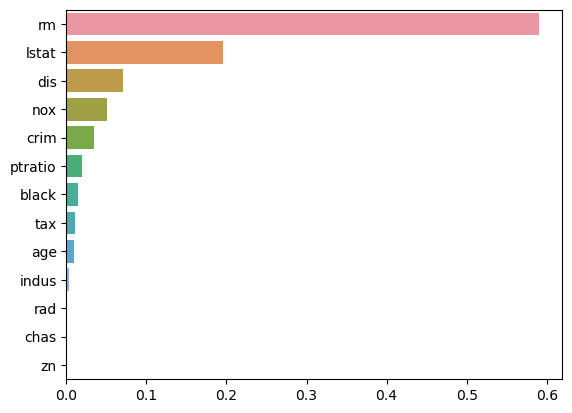

In [ ]:
sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.show()